In [ ]:
# 安装astroquery
# !pip install --pre astroquery

In [4]:
import numpy as np
from matplotlib import cm, colors, pyplot as plt

import astropy.units as u

from astroquery import gaia
from astroquery.gaia import Gaia as g


In [115]:
%%time

# 使用SQL(ADQL)查询：按视差降序排序，前100条数据
tab = g.launch_job_async('''
    select top 100
        *
    from gaiadr3.gaia_source_lite
    where parallax > 0
    order by parallax desc
''').get_results()

print(len(tab))

INFO: Query finished. [astroquery.utils.tap.core]
100
CPU times: user 104 ms, sys: 3.38 ms, total: 108 ms
Wall time: 6.46 s


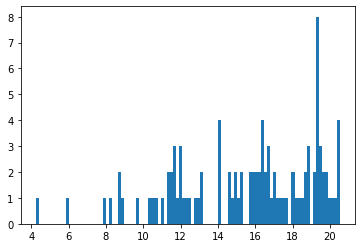

距离我们最近的100颗恒星


<Table length=100>
     source_id      random_index ... ebpminrp_gspphot      distance     
                                 ...       mag               lyr        
       int64           int64     ...     float32           float64      
------------------- ------------ ... ---------------- ------------------
5853498713190525696   1320081859 ...              0.0  4.246459923404928
4472832130942575872   1329945144 ...              0.0  5.962901729775837
3864972938605115520    766292388 ...               -- 7.8557935533509955
 762815470562110464    970765473 ...              0.0  8.304364906859634
2947050466531873024     52974825 ...               --    8.7093576886369
5140693571158946048    575090658 ...               --  8.724390528712428
5140693571158739840    633518913 ...               --  8.869889201402808
4075141768785646848    249919922 ...            1e-04   9.70626659012644
1926461164913660160   1195011327 ...               -- 10.305711408404521
                ...          ... ...              ...                ...
4847957293278177024    108944108 ...              0.0 19.704451607928075
 946632924007399936     91728796 ...               --  19.74136555855134
6427464123776727168     82124097 ...              0.0  19.89311349957701
2572901021957789568    296063152 ...               -- 19.954767609613956
6673000841376349696   1493486120 ...           0.0002  20.10616498245445
1638979384378696704   1624596075 ...               -- 20.258758442128823
6324325225803432320   1416906431 ...              0.0 20.394646173367363
2824770686019004032    541819637 ...               -- 20.396442863208335
2824770686019003904    770267785 ...               -- 20.427749501946835
6322070093095493504   1320391257 ...              0.0 20.549390541152214

In [116]:
# 把周年视差转换成距离：
# 1.距离（distance）= 1/周年视差（parallax）
tab['distance'] = 1 / tab['parallax']
tab['distance'].unit = 'kpc'
# 2.距离单位转换：千秒差距 -> 光年
tab['distance'] = tab['distance'].to(u.lightyear)

# 距离分布
plt.hist(tab['distance'], bins=(100))
plt.show()

# 打印表格
print('距离我们最近的100颗恒星')
display(tab)